# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project1/foodhub_order.csv')

In [5]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
df.shape

(1898, 9)

#### Observations:


---
There are 1898 rows and 9 columns.

---

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [8]:
df.dtypes.value_counts()

int64      4
object     4
float64    1
Name: count, dtype: int64

#### Observations:


---
The "order_id", "customer_id", "food_preparation_time", and "delivery_time" are type integer.



The "restaurant_name", "cuisine_type", "day_of_the_week", and "rating" are type strings.

The "cost_of_the_order" is type float.

The values in the "Non-Null Count" are identical at "1898" which indicates that there is no missing data value.

---

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [10]:
df.duplicated().sum()

0

#### Observations:


---
There are no missing values and no duplicates in the data.

---

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [12]:
df['food_preparation_time'].min()

20

In [13]:
round(df['food_preparation_time'].mean())

27

In [14]:
df['food_preparation_time'].max()

35

#### Observations:


---
The minimum time for the food preparation is 20.

The average time for the food preparation is 27.

The maximum time for the food preparation is 35.

There are a total of 1898 rows. "Shake Shack" is the top restaurant in 178 total restaurants and has 219 orders.

"American" is the top cuisine type in 14 total cuisine types and has 584 orders.  

The cost of the order ranges from 4.47 to 35.41 dollars in which the average cost is $16.50

There are total 1351 orders on Weekend and the rest are in the Weekday category.

There are 736 "not given" values in the "rating" column which has 4 unique items in this category.

The food preparation time ranges from 20 to 35 min and the average is 27 min.

The delivery time ranges from 15 to 33 min and the average is 24 min.

---

### **Question 5:** How many orders are not rated? [1 mark]

In [15]:
df.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:


---
There are 736 orders are not rated.

---

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [16]:
df['order_id'].nunique()

1898

There are 1898 rows of data

In [17]:
df['customer_id'].nunique()

1200

There are 1200 unique customers

In [18]:
df['restaurant_name'].nunique()

178

There are 178 restaurants

In [19]:
df['cuisine_type'].nunique()

14

There are 14 types of cuisine.

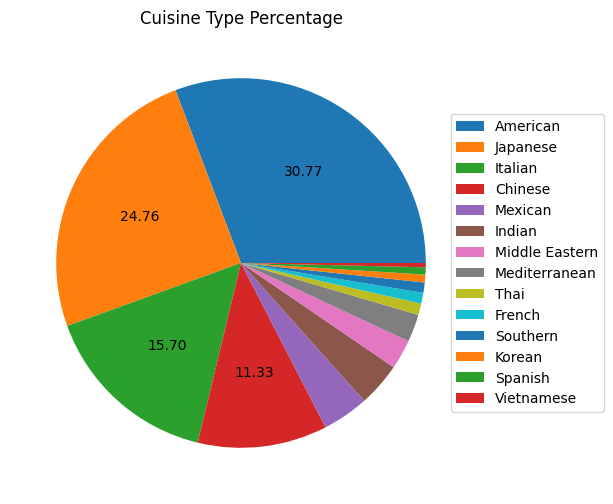

In [20]:
ax = df['cuisine_type'].value_counts().plot(kind='pie', figsize=(6,6),  labeldistance=None, legend=True,  \
                  autopct=lambda p: format(p, '.2f') if p > 10 else None)
plt.legend(bbox_to_anchor=(1.3,0.5), loc="center right")
plt.title('Cuisine Type Percentage')
plt. ylabel("");

American cuisine is the most popular, taking up about 31% of orders, and the Vietnamese cuisine has the least number of orders.

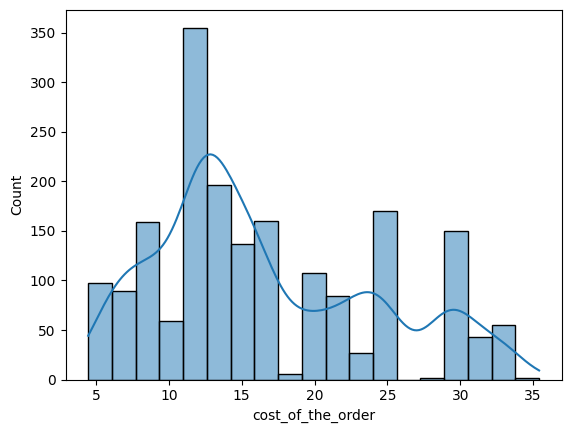

In [21]:
sns.histplot(data=df, x = 'cost_of_the_order', kde = True);


The cost of order peaks around $12

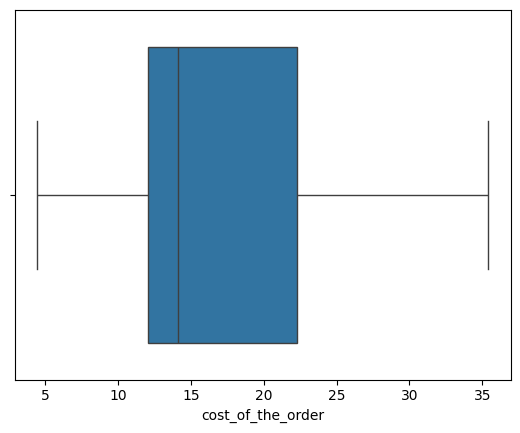

In [22]:
sns.boxplot(data=df, x='cost_of_the_order');

The data is slightly right skewed and there is no outlier.

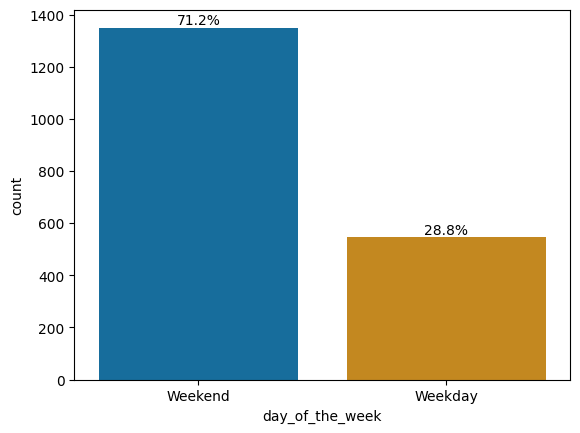

In [23]:
total_rows = df['day_of_the_week'].count()
ax = sns.countplot(data=df, x='day_of_the_week', palette = "colorblind", hue='day_of_the_week')
plt.bar_label(ax.containers[0],  fmt=lambda x: f'{(x/total_rows)*100:0.1f}%')
plt.bar_label(ax.containers[1],  fmt=lambda x: f'{(x/total_rows)*100:0.1f}%');


Total orders on the weekends are at 71% and much higher than the weekdays at 29%.

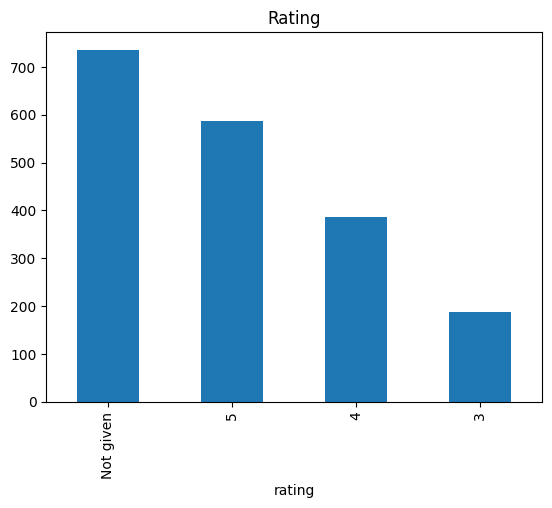

In [24]:
df['rating'].value_counts().plot(kind='bar', title='Rating');

The majority of orders are not rated and there is no rating at 1 or 2.

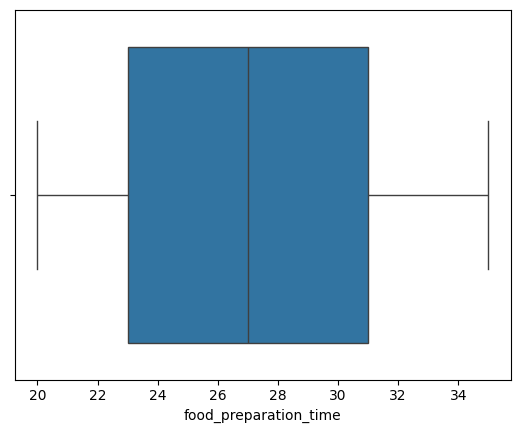

In [25]:
sns.boxplot(data=df, x='food_preparation_time');

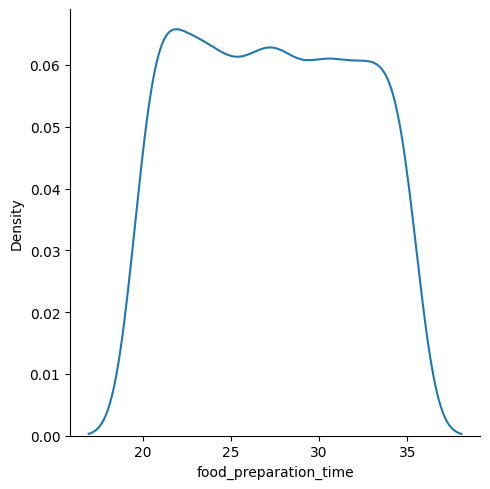

In [26]:
sns.displot(data=df, x='food_preparation_time', kind='kde');

The data is slightly symetric.

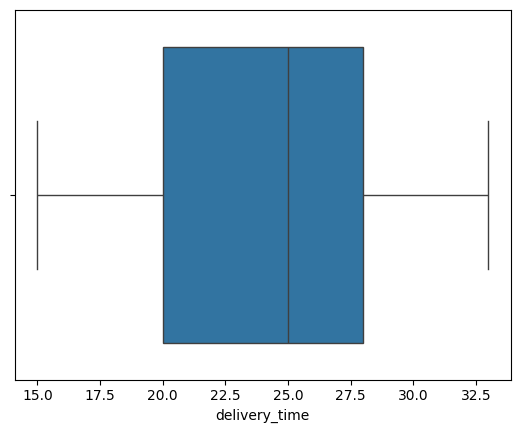

In [27]:
sns.boxplot(data=df, x='delivery_time');

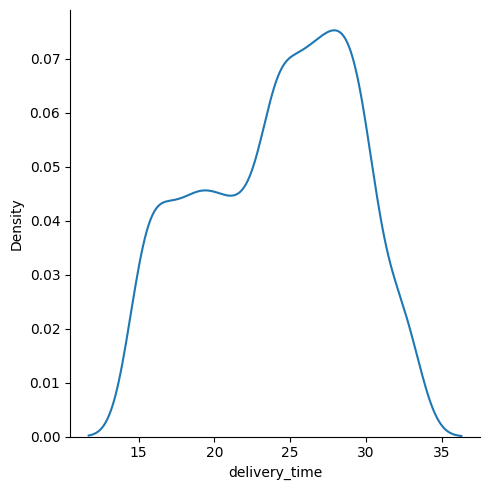

In [28]:
sns.displot(data=df, x='delivery_time', kind='kde');

The data is slightly left skewed.

#### Observations:


---
There are a total of 1898 orders, 1200 customers, 178 restaurants, and 14 cuisine types. The cost of order peaks around $12. Total orders on the weekends are at 71% and much higher than the weekdays at 29%. Almost 39% of total orders are not rated.

---

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [29]:
# Filter the dataframe and create a series for the column restaurant_name and its number of row counts
top_5_names = df['restaurant_name'].value_counts().head()
print(top_5_names)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


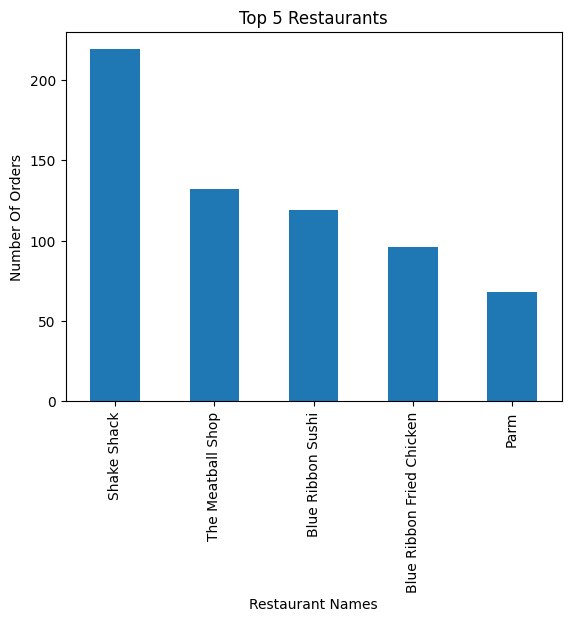

In [30]:
top_5_names.plot(kind='bar', title='Top 5 Restaurants')
plt.xlabel('Restaurant Names')
plt.ylabel('Number Of Orders');



#### Observations:


---
The top five restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fired Chicken, and Parm.

---

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [31]:
# Filter the dataframe where day_of_the_week contains Weekend
# and create a series with index as cuisine_type and value as number of rows
df[df.day_of_the_week == "Weekend"]['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

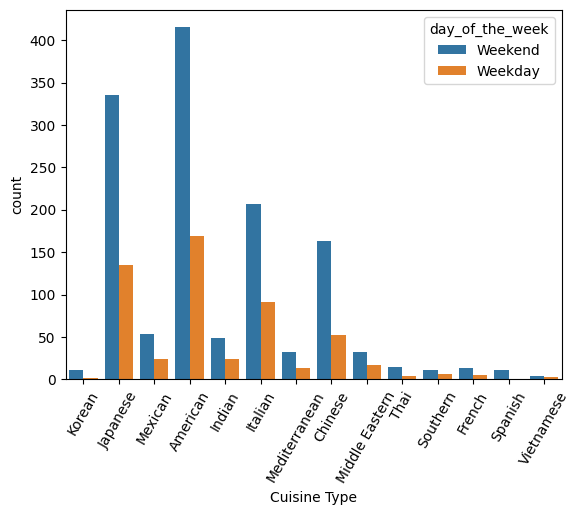

In [32]:
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=60);

#### Observations:


---
The most popular cuisine on weekends is the American cuisine with 415 orders.  

---

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [33]:
# Calculate the percentage by filtering the rows where cost is above 20
# and using shape method
cost_above_20 = df[df.cost_of_the_order > 20].shape[0]
perc_of_order = round((cost_above_20 / df.shape[0])*100)
print('The percentage of the orders cost more than $20: ', perc_of_order, '% ' )

The percentage of the orders cost more than $20:  29 % 


#### Observations:


---
The percentage of the orders cost more than $20 is 29%.

---

### **Question 10**: What is the mean order delivery time? [1 mark]

In [34]:
round(df['delivery_time'].mean(), )

24

#### Observations:


---
The mean order delivery time is 24 min.

---

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [35]:
# Create a series with index as customer_id and value as its number of orders
# Then use head() method to get the top 3.
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

In [36]:
# Print the customer_id and their number of orders
top_3_list= df.customer_id.value_counts().head(3).index
print('The IDs for the top 3 most frequent customers are: ', top_3_list[0], top_3_list[1], top_3_list[2])

print('And respectively the number of orders placed are: ', end="" )
for i in top_3_list:
  print(df[df.customer_id == i].shape[0]," ", end="")

The IDs for the top 3 most frequent customers are:  52832 47440 83287
And respectively the number of orders placed are: 13  10  9  

#### Observations:


---
The IDs for the top 3 most frequent customers are 52832 with 13 orders, 47440 with 10 orders, and 83287 with 9 orders.

---

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


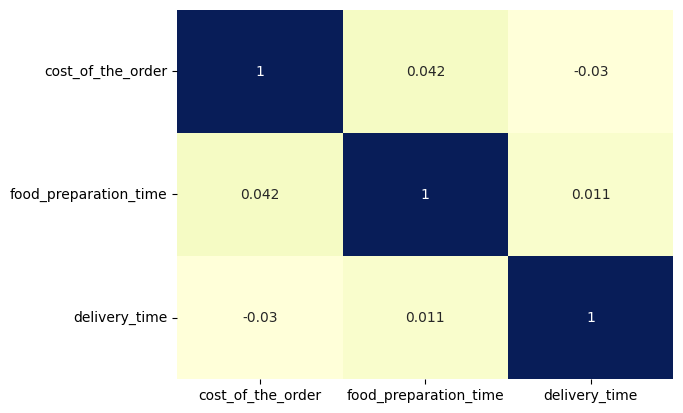

In [37]:
sns.heatmap(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cbar=False, cmap='YlGnBu');

The heat map shows no correlations between these numerical features.

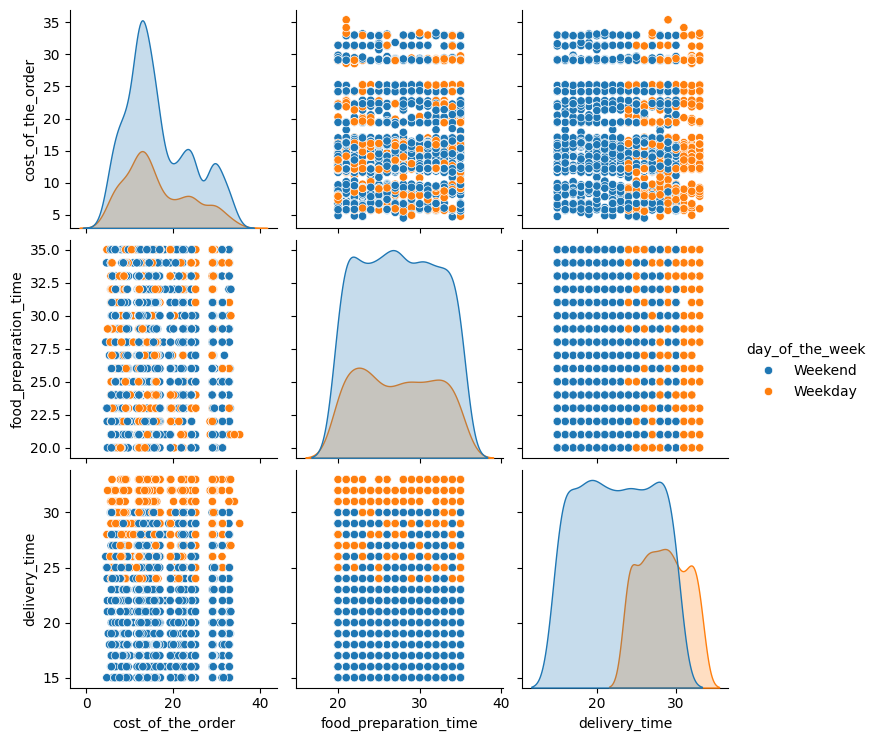

In [38]:
sns.pairplot(df, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'], hue='day_of_the_week');

The pair plots confirms the data scatter all over with no tendency of either positive or negative correlation at all.

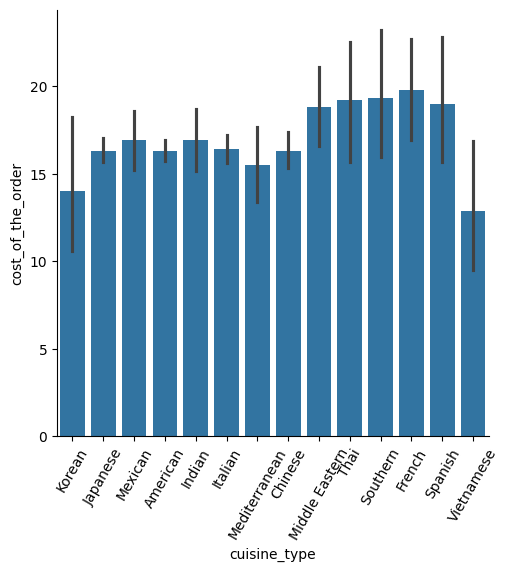

In [39]:
sns.catplot(data=df, kind='bar', x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=60);

The French cuisine type is the most expensive and the Vietnamese cuisine type is the least expensive in term of the cost of the order.

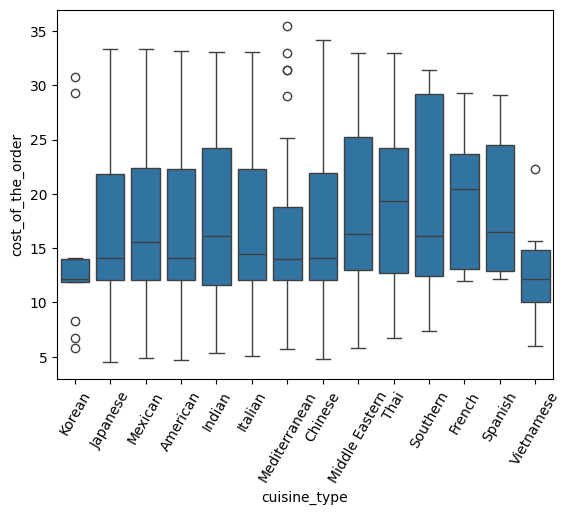

In [72]:
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=60);

The Korean, Vietnamese, and Mediterranean cuisines are the least expensive but they have outliers in the cost of some orders.

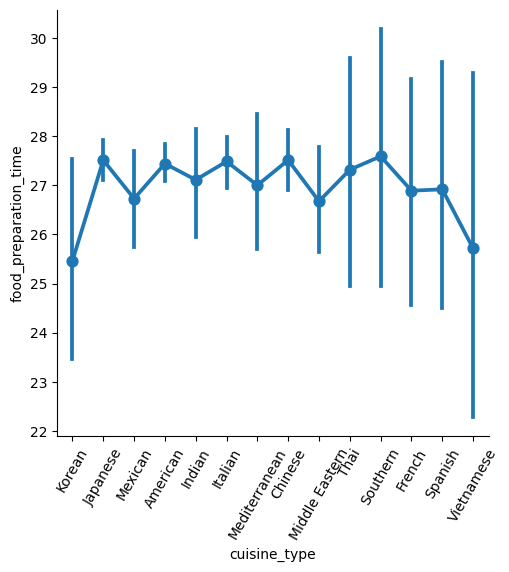

In [40]:
sns.catplot(data=df, kind="point", x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=60);

The Korean and Vietnamese cuisine types prepare food faster but the rest of the cuisine types have similar food preparation time.

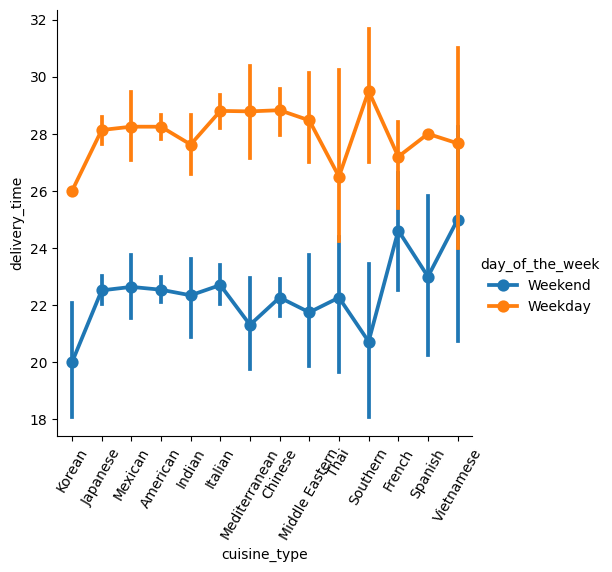

In [41]:
sns.catplot(data=df, kind="point", x='cuisine_type', y='delivery_time', hue='day_of_the_week')
plt.xticks(rotation=60);

The delivery time is clearly much longer in the weekdays.

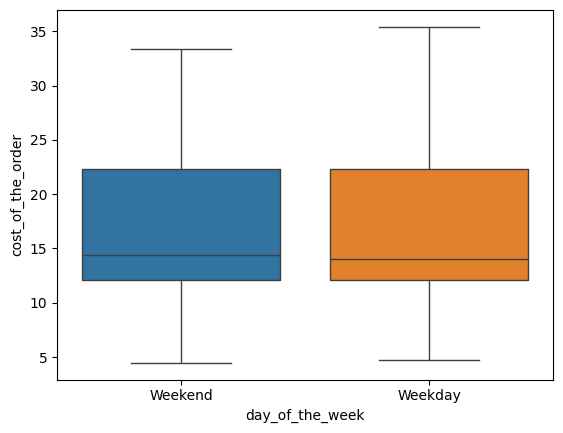

In [42]:
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', hue='day_of_the_week', legend=False);

The cost of the order is very similar for both weekdays and weekends.

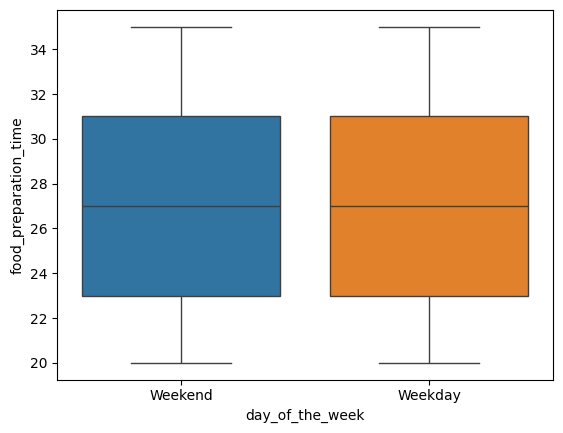

In [44]:
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time', hue='day_of_the_week', legend=False);

The food preparation time is very similar for both weekdays and weekends.

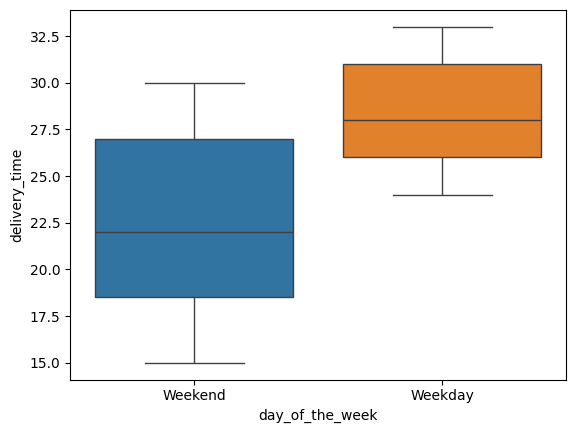

In [45]:
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week', legend=False);

The delivery time is clearly longer on the weekdays.

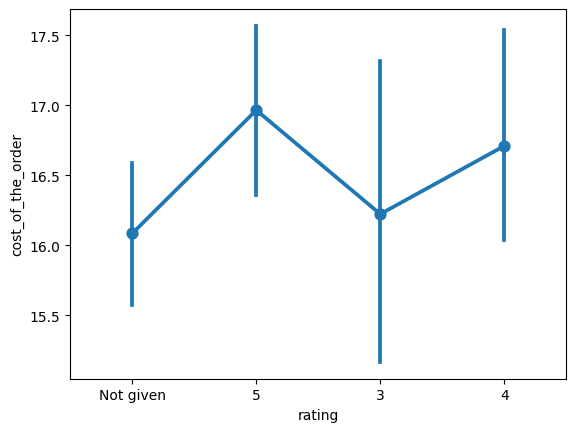

In [46]:
sns.pointplot(data=df, x='rating', y='cost_of_the_order');

The cost of the order does not seem to impact the rating.

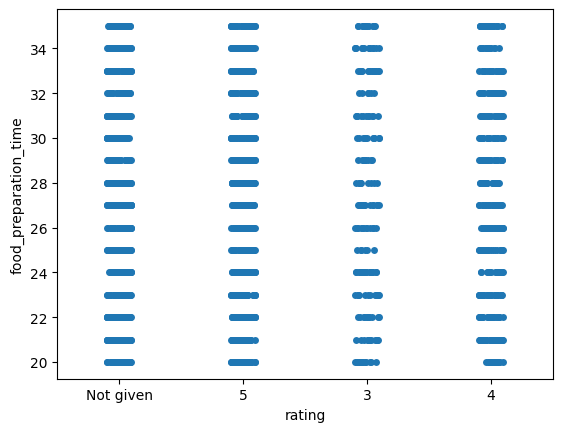

In [47]:
sns.stripplot(data=df, x='rating', y='food_preparation_time');

The data is very evenly distributed and shows no correlation between these two features, the rating and the food preparation time.

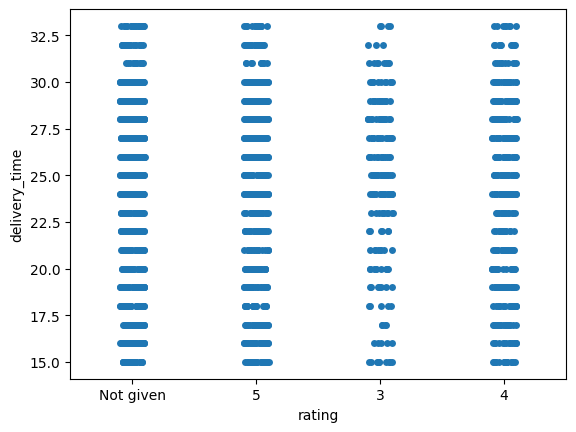

In [48]:
sns.stripplot(data=df, x='rating', y='delivery_time');

The data is very evenly distributed and shows no correlation between these two features, the rating  and the delivery time.

In [49]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

The top 10 restaurants with the most sale revenue.

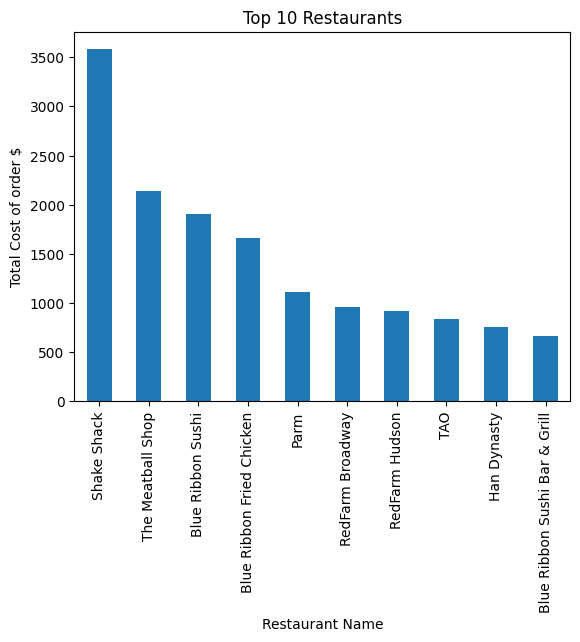

In [50]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)\
      .plot(kind='bar', title='Top 10 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Total Cost of order $');


The bar graph visualizes Shake Shack with the most total sales revenue.

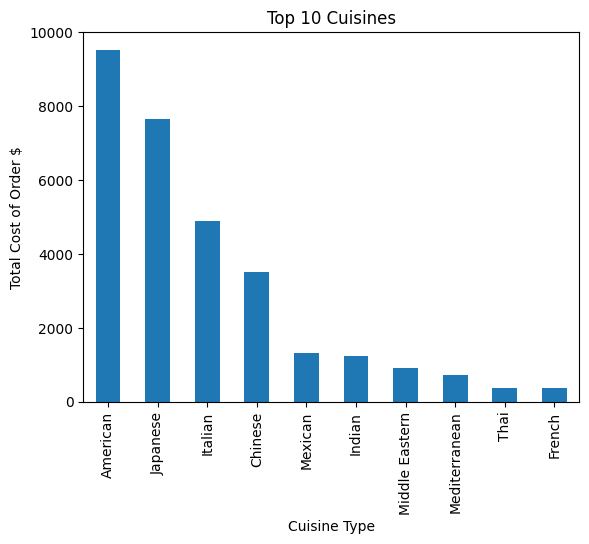

In [51]:
df.groupby(['cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10) \
      .plot(kind='bar', title="Top 10 Cuisines")
plt.xlabel('Cuisine Type')
plt.ylabel('Total Cost of Order $');

The bar graph indicates American cuisine with the most sales revenue.

#### Observations:


---
The heat map and pair plots show no correlations at all between the numerical features.

The French cuisine type is the most expensive in term of the cost of the order.
The Korean, Vietnamese, and Mediterranean cuisines are the least expensive but they have outliers in the cost of some orders.
The Korean and Vietnamese cuisine types prepare food faster.

The delivery time is clearly much longer in the weekdays.
Otherwise, the data shows no correlation between other categorical and numerical features, such as cost of the order vs day of the week and rating,
the rating vs the food preparation time and delivery time, the food preparation time vs day of the week.

Shake Shack restaurant and American cuisine type has the most total sales revenue.

---

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [52]:
# Data imputation & type conversion for rating column on a subset copy
df_subset = df.copy()
df_subset['rating'] = df_subset['rating'].replace(['Not given'], np.nan)
df_subset['rating'] = df_subset['rating'].astype('Int32')

In [53]:
# Filter the rows that do not have a rating as nan
df_subset = df_subset[df_subset.rating != np.nan]

In [54]:
# Create a series with the restaurant names and the sum of their rating using groupby
series_rating = df_subset.groupby('restaurant_name')['rating'].count().sort_values(ascending=False).reset_index()

In [55]:
# Filter the series where the rating is above 50
promo_rest_50 = series_rating[series_rating.rating > 50]['restaurant_name']

In [56]:
# Filter the rows of the dataframe subset containing these restaurant names
df_mean = df_subset[df_subset.restaurant_name.isin(promo_rest_50)]

In [57]:
# Create a series with the restaurant names and the mean of their ratings
series_mean = df_mean.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()

In [58]:
# Filter the series to get only restaurant names with their mean rating above 4
promo_rest_4 = series_mean[series_mean.rating > 4].restaurant_name

In [59]:
# Print the list of these restaurant names
promo_rest_list = pd.Series(promo_rest_4).tolist()
print('The restaurants that met the criteria are ', promo_rest_list)

The restaurants that met the criteria are  ['The Meatball Shop', 'Blue Ribbon Fried Chicken', 'Shake Shack', 'Blue Ribbon Sushi']


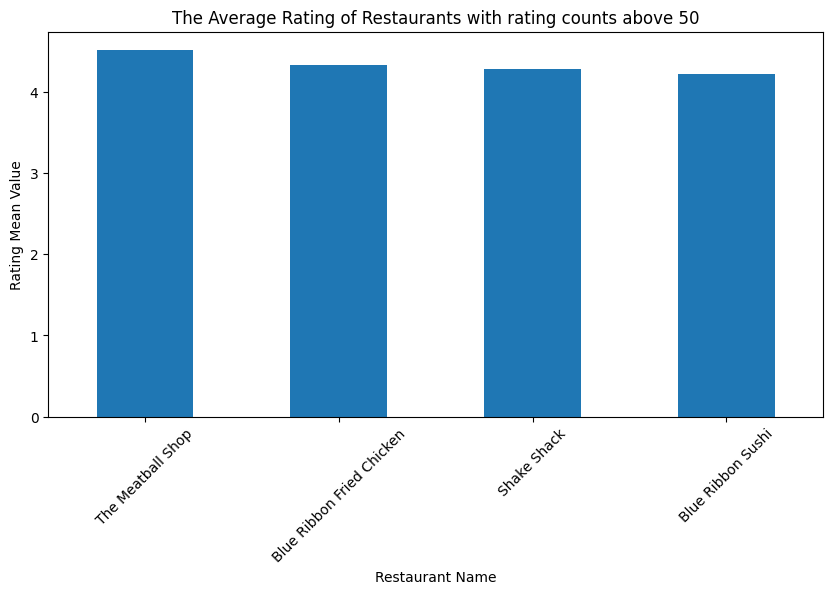

In [60]:
# Criteria visualization
df_subset.query('rating.notna()') \
  .groupby(['restaurant_name'])['rating'] \
  .agg(['mean', 'count']) \
  .query('count > 50') \
  .sort_values('mean', ascending=False)['mean'] \
  .plot(kind = 'bar', figsize=(10,5), title='The Average Rating of Restaurants with rating counts above 50')
plt.xticks(rotation=45)
plt.xlabel('Restaurant Name')
plt.ylabel('Rating Mean Value');


#### Observations:


---
The restaurants that met the criteria are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.  

---

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [61]:
# Create a new column named 'revenue' using apply method and lambda function instead of a regular function.
df['revenue'] = df['cost_of_the_order'] \
    .apply(lambda x: x*0.25 if x>20 else (x*0.15 if x>5 else x*0))

In [62]:
# Add the total values in the revenue column
net_revenue = df['revenue'].sum()
print('The net revenue generated by the company across all orders is $', round(net_revenue, 2))

The net revenue generated by the company across all orders is $ 6166.3


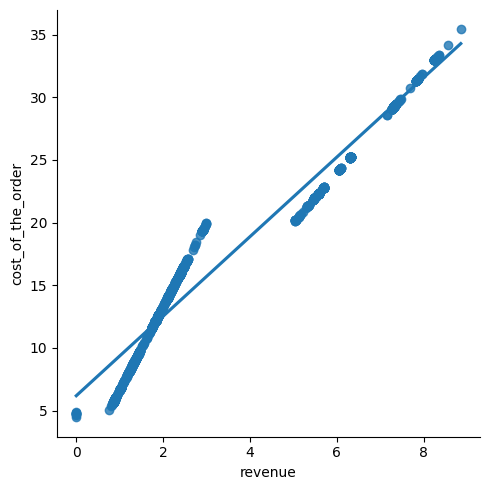

In [63]:
sns.lmplot(data=df, x='revenue', y='cost_of_the_order');

#### Observations:


---
The net revenue generated by the company across all orders is $6166.3

---

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [64]:
# Create a new column for the total wait time
df['total_wait_time'] = df['food_preparation_time'] + df['delivery_time']

In [65]:
# Add the number of rows where the wait time is above 60
num_above_60 = df[df.total_wait_time > 60].value_counts().sum()

In [66]:
# calculate the percentage of these orders to the total orders
perc = round((num_above_60 / df.shape[0])*100)

In [67]:
print('There percentage of orders take more than 60 minutes to deliver is ', perc, '%')

There percentage of orders take more than 60 minutes to deliver is  11 %


#### Observations:


---
There percentage of orders take more than 60 minutes to deliver is 11%


---

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [68]:
weekday_mean = round(df[(df.day_of_the_week == 'Weekday')]['delivery_time'].mean())

In [69]:
weekend_mean = round(df[(df.day_of_the_week == 'Weekend')]['delivery_time'].mean())

In [70]:
print('The delivery time of the orders on weekdays and weekends are', \
      weekday_mean, 'min and', weekend_mean, 'min respectively.'   )

The delivery time of the orders on weekdays and weekends are 28 min and 22 min respectively.


#### Observations:


---
The delivery time of the orders on weekdays and weekends are 28 min and 22 min respectively.

---

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The American cuisine has the most orders about 31%, followed by Japanese and Italian cuisines.
The cost of the order around $12 has the highest number of orders.
*  Almost 39% of orders are not rated. About 71% of orders are received on the weekend.
The average delivery time on weekdays are 28 min or 6 min more than on weekends.
*  In the multivariate analysis, there are no correlation between the features. Of course, there is a high correlation between the cost of order and the revenue generated.

### Recommendations:

*  FoodHub should target the next cultural groups to join its app such as Chinese, Mexican, and Indian with marketing ads for the potential growth.
*  FoodHub should offer some incentives for customers who give feedback in rating to help enhancing the customer experience, and for customers who order on weekdays to boost the revenue.  
*  Cuisines with average cost of order between 11 to $17 should be encouraged to join the app because most orders are placed in this range.  

---

In [73]:
#@title Convert ipynb to HTML in Colab
!jupyter nbconvert --to html Bac_Le_Project1_FoodHub.ipynb

[NbConvertApp] Converting notebook Bac_Le_Project1_FoodHub.ipynb to html
[NbConvertApp] Writing 2085217 bytes to Bac_Le_Project1_FoodHub.html
